In [ ]:
# install & import required packages
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# **Pre-Processing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/Shareddrives/BA305- Team Project/breast-cancer.csv')
df.head()

Mounted at /content/drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# transform diagnosis into a binary categorical variable
df['diagnosis'] = df['diagnosis'].replace("M", 1)
df['diagnosis'] = df['diagnosis'].replace("B", 0)

In [ ]:
# split into three detasets
df_se_col=df.filter(regex='_se').columns
df_mean_col=df.filter(regex='_mean').columns
df_worst_col=df.filter(regex='_worst').columns

#**KNN With ‘Mean and Worst’ Columns**

In [ ]:
df_meanworst = df.drop(df_se_col, axis=1)

In [ ]:
# get list of column names
predictors = list(df_meanworst.columns)
# remove the 'Diagnosis' column, since this is what we will try to predict
predictors.remove('diagnosis')

# Store predictors and target into X and y, respectively
X = df_meanworst.drop(columns=['diagnosis'])
y = df_meanworst['diagnosis']

In [ ]:
# split dataset into training (60%) and test (40%) sets
train_df, test_df = train_test_split(df_meanworst, test_size = 0.4, random_state = 1, stratify = y)
print('Training set:', train_df.shape, 'Testing set:', test_df.shape)

Training set: (341, 22) Testing set: (228, 22)


In [ ]:
# Standardize training and validation features using 'StandatdScaler()'
scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])

train_X = scaler.transform(train_df[predictors])
test_X = scaler.transform(test_df[predictors])
train_y = train_df['diagnosis']
test_y = test_df['diagnosis']

In [ ]:
# Run the k-NN model with a random guess about the neighboors, set k=1 for instance
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(train_X, train_y)
pred_y = knn.predict(test_X)
print('Accuracy:', accuracy_score(test_y, pred_y))

Accuracy: 0.9385964912280702


In [ ]:
# Choosing the best k for the validation set
# using a 'for' loop and range(start, stop, step)
results = []
for k in range(1, 25, 1):

    print('iteration', k, "of", 24)
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(test_y, knn.predict(test_X))
    })


results_df = pd.DataFrame(results)
results_df

iteration 1 of 24
iteration 2 of 24
iteration 3 of 24
iteration 4 of 24
iteration 5 of 24
iteration 6 of 24
iteration 7 of 24
iteration 8 of 24
iteration 9 of 24
iteration 10 of 24
iteration 11 of 24
iteration 12 of 24
iteration 13 of 24
iteration 14 of 24
iteration 15 of 24
iteration 16 of 24
iteration 17 of 24
iteration 18 of 24
iteration 19 of 24
iteration 20 of 24
iteration 21 of 24
iteration 22 of 24
iteration 23 of 24
iteration 24 of 24


,k,accuracy
0,1,0.938596
1,2,0.956140
2,3,0.960526
3,4,0.951754
4,5,0.964912
5,6,0.956140
6,7,0.960526
7,8,0.956140
8,9,0.956140
9,10,0.956140


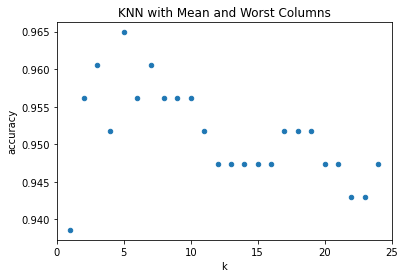

In [ ]:
# plot accuracy vs. k
results_df.plot.scatter(x='k', y='accuracy', xlim=[0, 25], title = 'KNN with Mean and Worst Columns');

In [ ]:
# Show the confusion matrix and accuracy for the validation data, using k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)

pred_y = knn.predict(test_X)

print(confusion_matrix(test_y, pred_y))
print('Accuracy:', accuracy_score(test_y, pred_y))

[[141   2]
 [  6  79]]
Accuracy: 0.9649122807017544


#**KNN With ‘Mean’ Columns**

In [ ]:
df_mean = df.drop(df_se_col, axis=1)
df_mean = df_mean.drop(df_worst_col, axis=1)

In [ ]:
# get list of column names
predictors = list(df_mean.columns)
# remove the 'Diagnosis' column, since this is what we will try to predict
predictors.remove('diagnosis')

# Store predictors and target into X and y, respectively
X = df_mean.drop(columns=['diagnosis'])
y = df_mean['diagnosis']

In [ ]:
# split dataset into training (60%) and test (40%) sets
train_df, test_df = train_test_split(df_mean, test_size = 0.4, random_state = 1, stratify = y)
print('Training set:', train_df.shape, 'Testing set:', test_df.shape)

Training set: (341, 12) Testing set: (228, 12)


In [ ]:
# Standardize training and validation features using 'StandatdScaler()'
scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])
train_X = scaler.transform(train_df[predictors])
test_X = scaler.transform(test_df[predictors])
train_y = train_df['diagnosis']
test_y = test_df['diagnosis']

In [ ]:
# Choosing the best k for the validation set
# using a 'for' loop and range(start, stop, step)
results = []
for k in range(1, 25, 1):

    print('iteration', k, "of", 24)
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(test_y, knn.predict(test_X))
    })


results_df = pd.DataFrame(results)
results_df

iteration 1 of 24
iteration 2 of 24
iteration 3 of 24
iteration 4 of 24
iteration 5 of 24
iteration 6 of 24
iteration 7 of 24
iteration 8 of 24
iteration 9 of 24
iteration 10 of 24
iteration 11 of 24
iteration 12 of 24
iteration 13 of 24
iteration 14 of 24
iteration 15 of 24
iteration 16 of 24
iteration 17 of 24
iteration 18 of 24
iteration 19 of 24
iteration 20 of 24
iteration 21 of 24
iteration 22 of 24
iteration 23 of 24
iteration 24 of 24


,k,accuracy
0,1,0.916667
1,2,0.929825
2,3,0.938596
3,4,0.947368
4,5,0.934211
5,6,0.934211
6,7,0.938596
7,8,0.934211
8,9,0.929825
9,10,0.934211


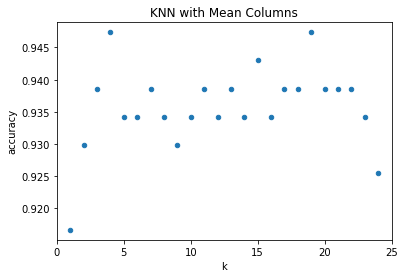

In [ ]:
# plot accuracy vs. k
results_df.plot.scatter(x='k', y='accuracy', xlim=[0, 25], title = 'KNN with Mean Columns');

In [ ]:
# Show the confusion matrix and accuracy for the validation data, using k = 5
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_X, train_y)

pred_y = knn.predict(test_X)

print(confusion_matrix(test_y, pred_y))
print('Accuracy:', accuracy_score(test_y, pred_y))

[[141   2]
 [ 10  75]]
Accuracy: 0.9473684210526315


#**KNN With 'Worst' Columns**

In [ ]:
df_worst=df.drop(df_se_col, axis=1)
df_worst=df_worst.drop(df_mean_col, axis=1)

In [ ]:
# get list of column names
predictors = list(df_worst.columns)
# remove the 'Diagnosis' column, since this is what we will try to predict
predictors.remove('diagnosis')

# Store predictors and target into X and y, respectively
X = df_worst.drop(columns=['diagnosis'])
y = df_worst['diagnosis']

In [ ]:
# split dataset into training (60%) and test (40%) sets
train_df, test_df = train_test_split(df_worst, test_size = 0.4, random_state = 1, stratify = y)
print('Training set:', train_df.shape, 'Testing set:', test_df.shape)

Training set: (341, 12) Testing set: (228, 12)


In [ ]:
# Standardize training and validation features using 'StandatdScaler()'
scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])
train_X = scaler.transform(train_df[predictors])
test_X = scaler.transform(test_df[predictors])
train_y = train_df['diagnosis']
test_y = test_df['diagnosis']

In [ ]:
# Run the k-NN model with a random guess about the neighboors, set k=1 for instance
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(train_X, train_y)
pred_y = knn.predict(test_X)
print('Accuracy:', accuracy_score(test_y, pred_y))

Accuracy: 0.9429824561403509


In [ ]:
# Choosing the best k for the validation set
# using a 'for' loop and range(start, stop, step)
results = []
for k in range(1, 25, 1):

    print('iteration', k, "of", 24)
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(test_y, knn.predict(test_X))
    })


results_df = pd.DataFrame(results)
results_df

iteration 1 of 24
iteration 2 of 24
iteration 3 of 24
iteration 4 of 24
iteration 5 of 24
iteration 6 of 24
iteration 7 of 24
iteration 8 of 24
iteration 9 of 24
iteration 10 of 24
iteration 11 of 24
iteration 12 of 24
iteration 13 of 24
iteration 14 of 24
iteration 15 of 24
iteration 16 of 24
iteration 17 of 24
iteration 18 of 24
iteration 19 of 24
iteration 20 of 24
iteration 21 of 24
iteration 22 of 24
iteration 23 of 24
iteration 24 of 24


,k,accuracy
0,1,0.942982
1,2,0.947368
2,3,0.956140
3,4,0.947368
4,5,0.960526
5,6,0.951754
6,7,0.956140
7,8,0.956140
8,9,0.960526
9,10,0.956140


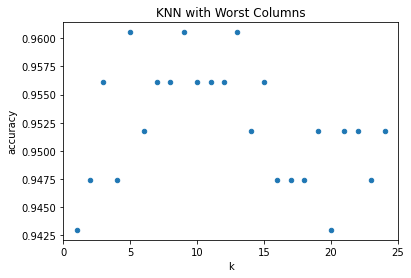

In [ ]:
# plot accuracy vs. k
results_df.plot.scatter(x='k', y='accuracy', xlim=[0, 25], title = 'KNN with Worst Columns');

In [ ]:
# Show the confusion matrix and accuracy for the validation data, using k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)

pred_y = knn.predict(test_X)

print(confusion_matrix(test_y, pred_y))
print('Accuracy:', accuracy_score(test_y, pred_y))

[[141   2]
 [  7  78]]
Accuracy: 0.9605263157894737
